<a href="https://colab.research.google.com/github/igor531205/data_science/blob/main/lesson_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Выполнил Пушкарев Игорь Игоревич. Группа 23.М08-мм.***

### Финальный проект по курсу Data Science: инструментарий и жизненный цикл проекта.

---

Мини-DS-проект. Задача - прогнозирование заболеваемости диабетом [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек. Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

*Импортируем необходимые для дальнейшей работы библиотеки.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import f_regression
# import scipy.stats as stats
# from sklearn.metrics import mean_squared_error, r2_score


# для работы с графиками
%matplotlib inline

# отключаем предупреждения
warn.filterwarnings('ignore')

*Загружаем данные по ссылке*



In [ ]:
# ссылка на датасет
link = 'https://raw.githubusercontent.com/igor531205/data_science/main/datasets/pima-indians-diabetes.csv'

# Считываем данные
df=pd.read_csv(link, index_col=False)

# Отключаем ограничение в отображении столбцов
pd.options.display.max_columns = None

# Выводим 5 первых строк
df.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*Выведем размеры таблицы (кол-во строк, кол-во столбцов)*

In [ ]:
df.shape

(768, 9)

*Выведем сводную информацию о DataFrame*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*Выведем все столбцы*

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Columns:
* Pregnancies: Number of times pregnant;
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test;
* BloodPressure: Diastolic blood pressure (mm Hg);
* SkinThickness: Triceps skin fold thickness (mm);
* Insulin: 2-Hour serum insulin (mu U/ml);
* BMI: Body mass index (weight in kg/(height in m)^2);
* DiabetesPedigreeFunction: Diabetes pedigree function;
* Age: Age (years);
* Outcome: Class variable (0 or 1).

*Выведем информацию по количественным признакам*

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Колонки 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome' имеют минимальные значения '0'.

'Pregnancies' и 'Outcome' могут принимать значения '0', остальные колонки со значением '0' будем считать пропущенными значениями.

*Заменим '0' значения явным указанием Null*

In [ ]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, pd.NA)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    object 
 2   BloodPressure             733 non-null    object 
 3   SkinThickness             541 non-null    object 
 4   Insulin                   394 non-null    object 
 5   BMI                       757 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 54.1+ KB


*Заполним пропущенные значения Null медианными значениями*

In [ ]:
df.fillna(df.median(), inplace=True)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Выведем гистограммы частот непрерывных признаков*

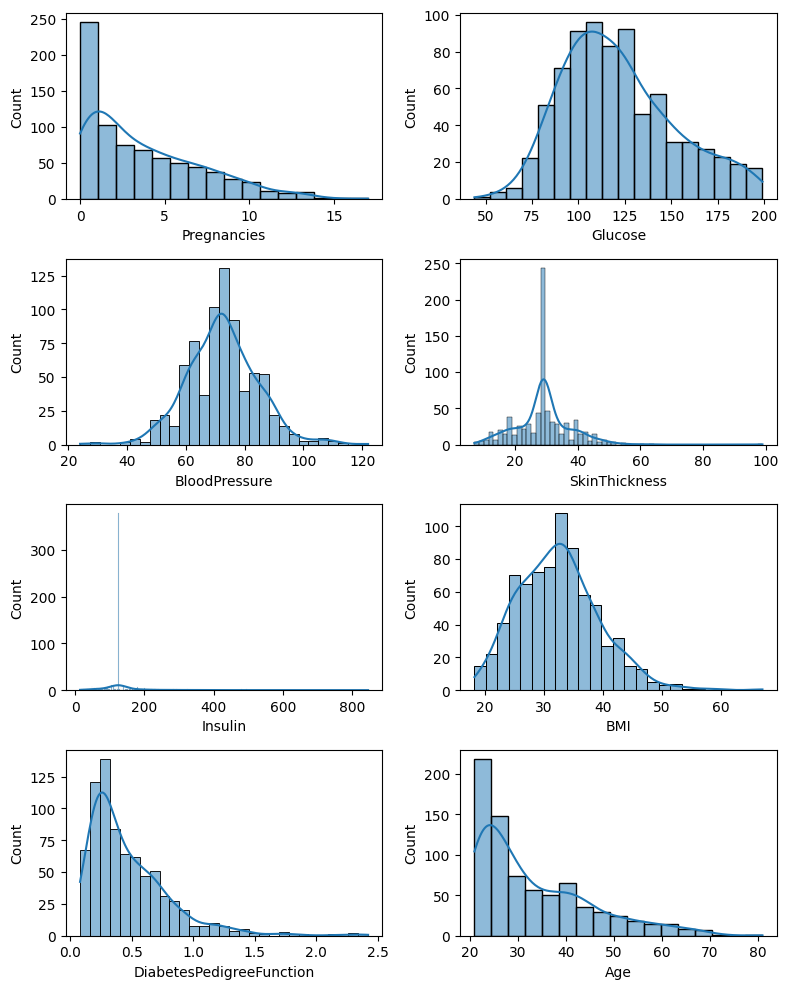

In [ ]:
# Количественные признаки в датасете
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Создание гистограмм для каждого признака
fig, ax = plt.subplots(4, 2, figsize=(8, 10))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=ax[i])

plt.tight_layout()
plt.show()

*Выведем матрицу рассеяния*

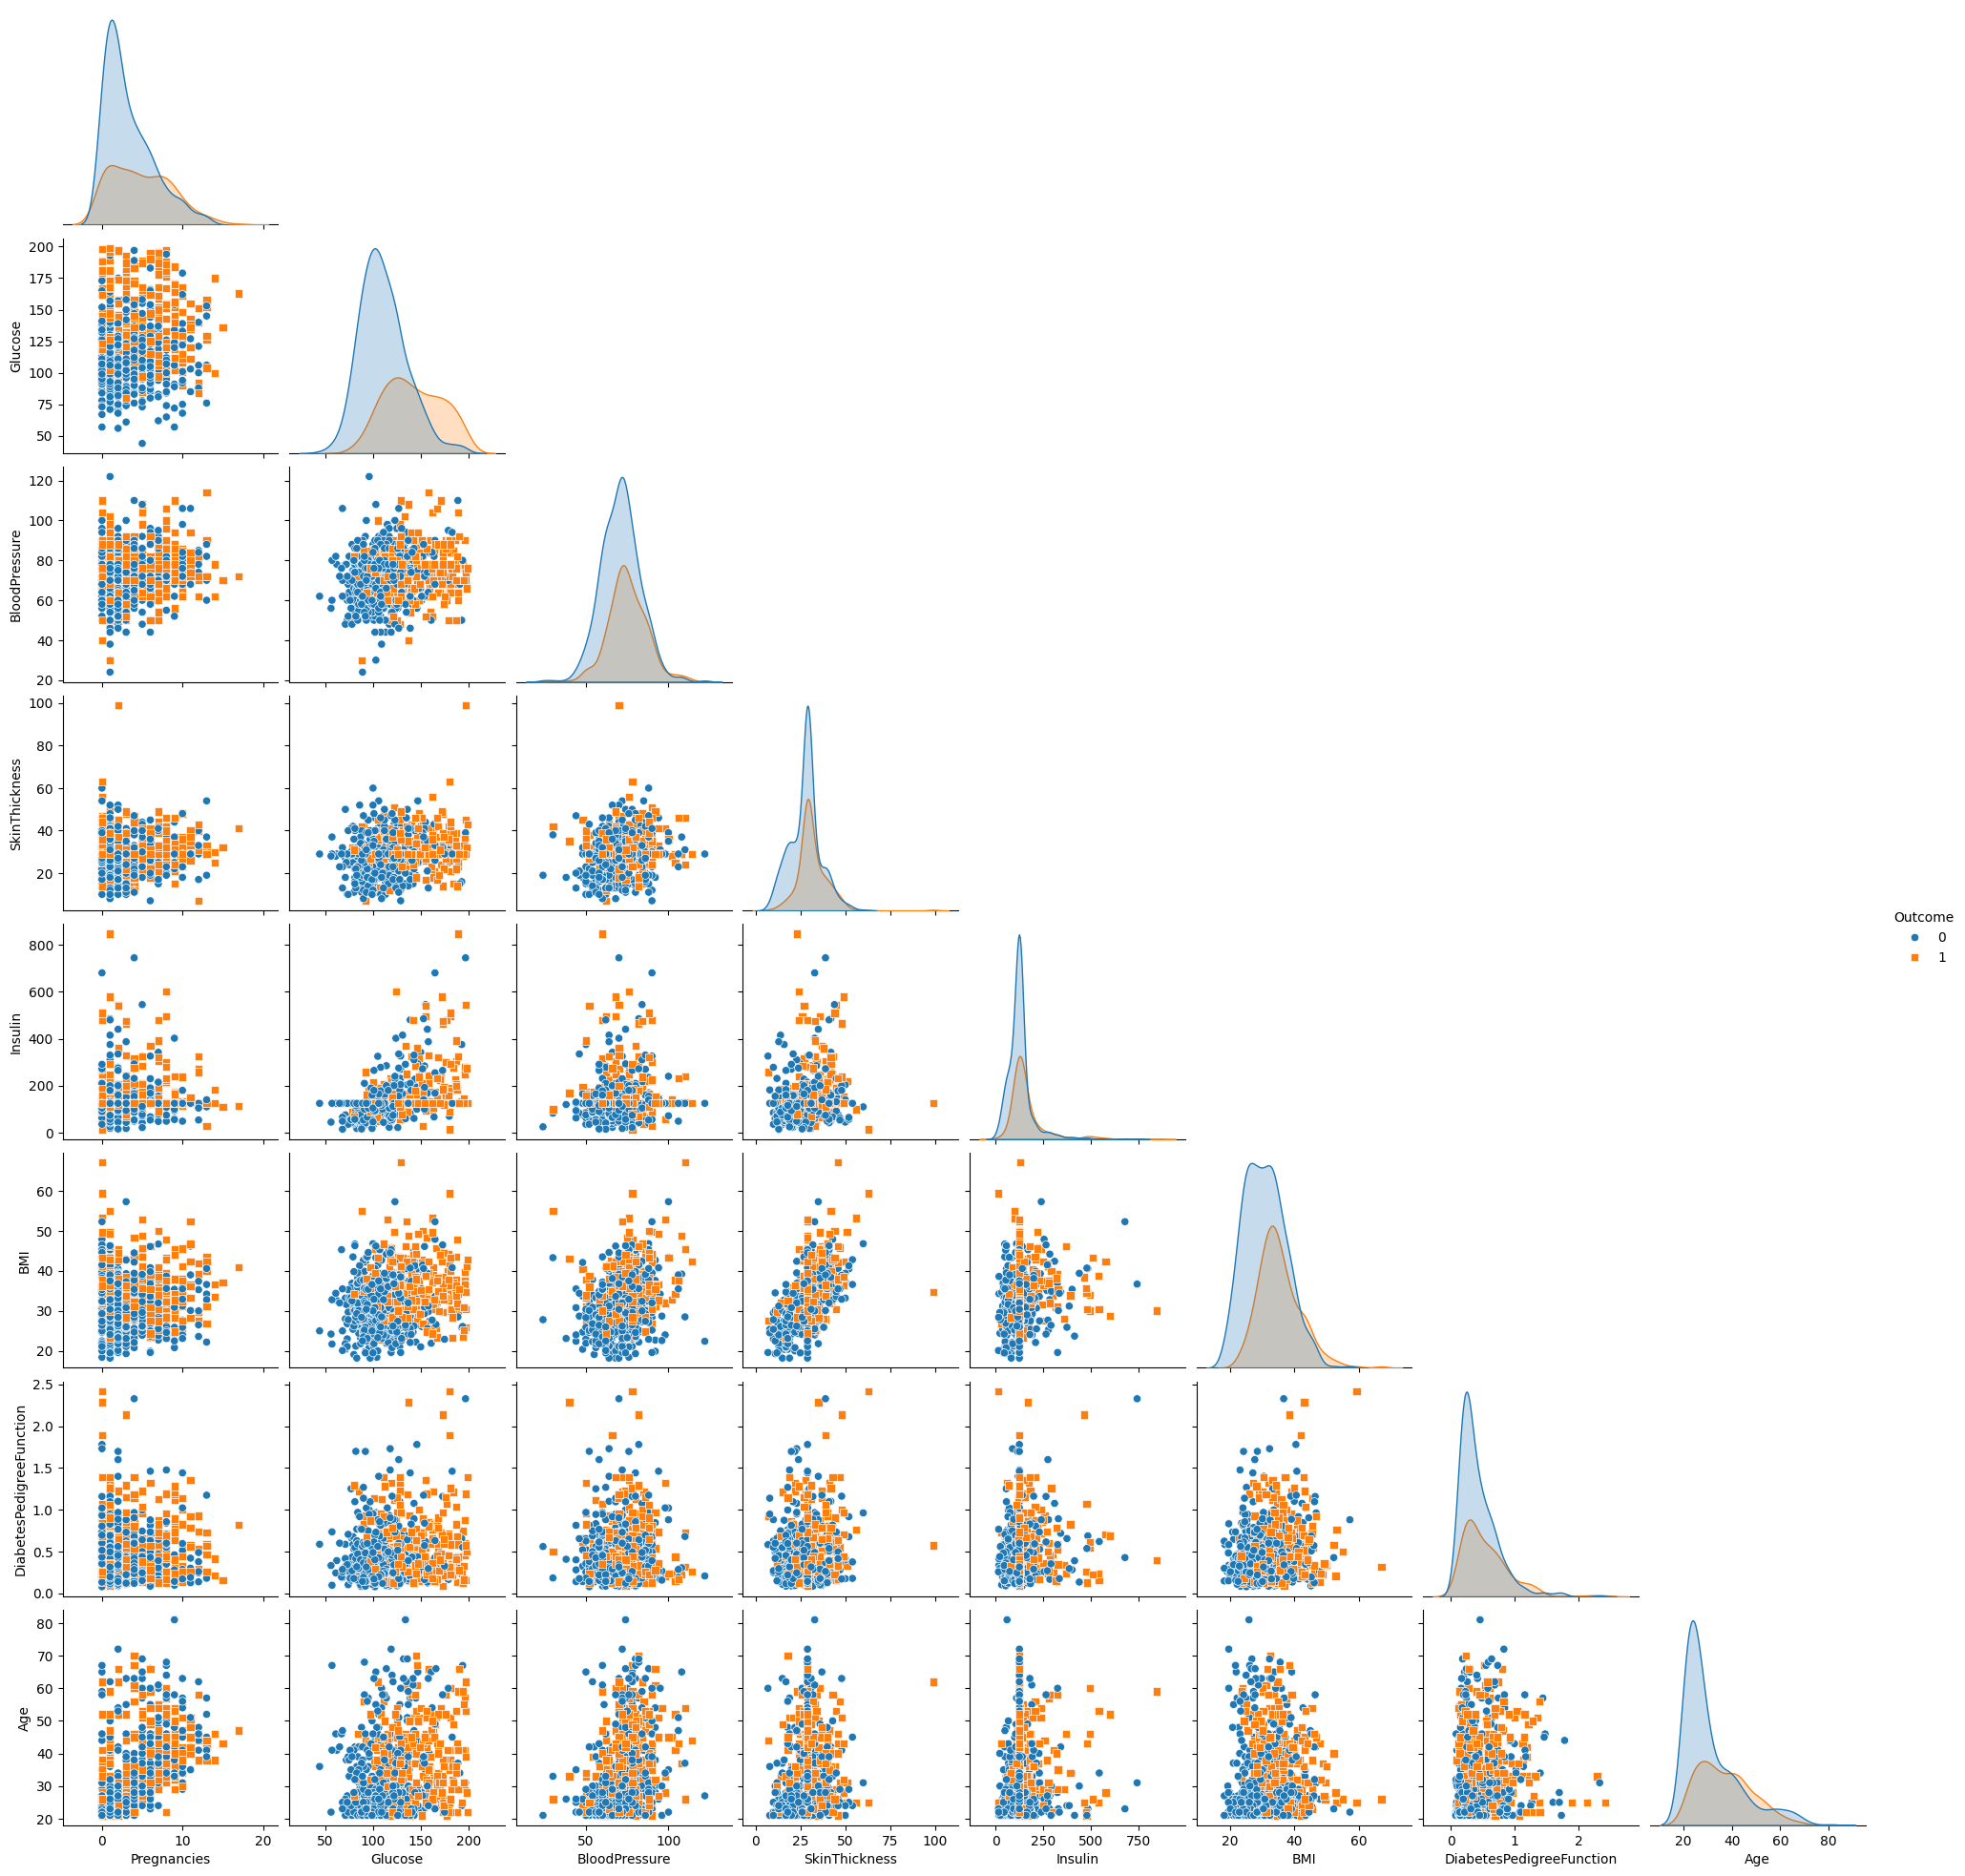

In [ ]:
sns.pairplot(df, hue="Outcome", markers=["o", "s"], corner=True)
plt.show()

*Выведем влияние признаков на наличие диабета с помощью виолончельных диаграмм*

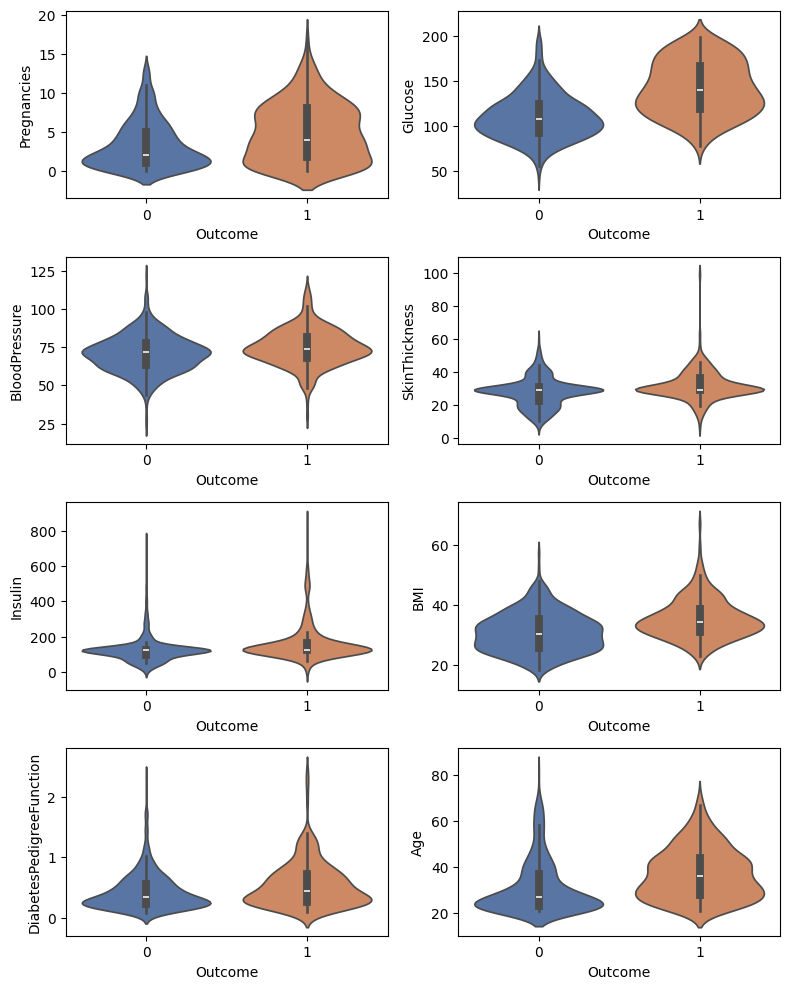

In [ ]:
# Создание виолончелей для каждого признака
fig, ax = plt.subplots(4, 2, figsize=(8, 10))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.violinplot(data=df, x='Outcome', y=feature, ax=ax[i], palette='deep')

plt.tight_layout()
plt.show()

Анализ виолончельных диаграмм:
*	Pregnancies – женщины, перенесшие беременность большое количество раз, чаще болеют диабетом;
*	Glucose – в группе риска заболевания диабетом находятся люди с высоким значением концентрации глюкозы в плазме;
*	BloodPressure - артериальное давление визуально не влияет на наличие диабета;
*	SkinThickness – повышенная толщина кожной складки трицепса не значительно влияет на наличие диабета;
*	Insulin - уровень инсулина не значительно влияет на наличие диабета;
*	BMI – люди с повышенным индексом массы тела чаще болеют диабетом, это связано с ожирением;
*	DiabetesPedigreeFunction - предрасположенность к диабету также выше у группы с наличием диабета;
*	Age (возраст) – у людей с возрастом увеличивается вероятность заболевания диабетом.

*Построим матрицу корреляций*

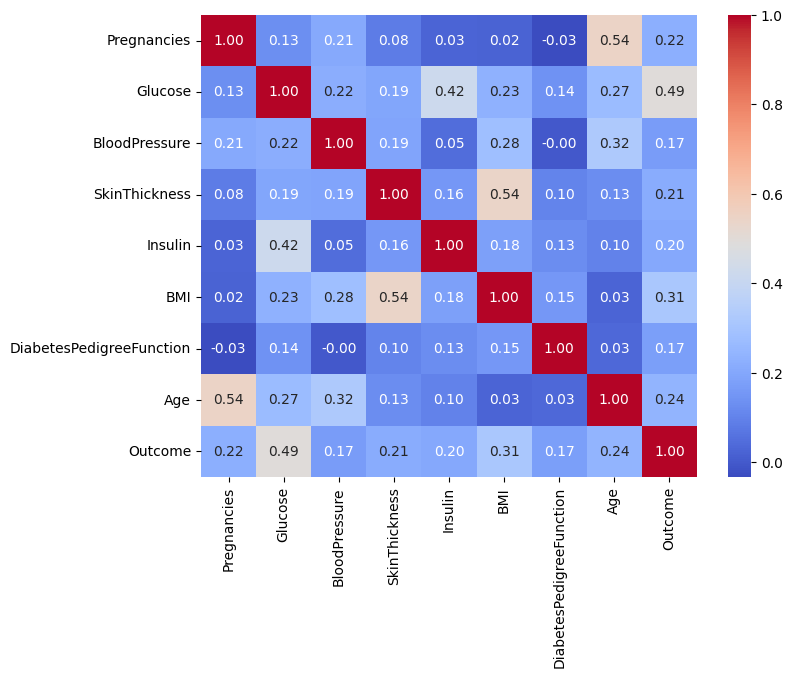

In [ ]:
# Расчет корреляций
correlation_matrix = df.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Матрица корреляций подтверждает результаты визуального анализа. Основные признаки оказывающие значительное влияние на предсказание наличия диабета – это Glucose (уровень глюкозы) и BMI (индекс массы тела). Age (возраст) выделяется среди признаков, имеющих слабую корреляционную зависимость с целевым признаком.

*Произведем масштабирование признаков*

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Масштабирование признаков
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493742,0.240305,0.152250,0.291518,0.168179,0.204015
std,0.198210,0.196376,0.123435,0.095557,0.103826,0.140597,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.489796,0.239130,0.133413,0.288344,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Произведем разделение выборки*

In [ ]:
# Разделение данных на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

*Подбор оптимальных гиперпараметров*

In [ ]:
# Выбор модели
model = LogisticRegression()

# Сетка гиперпараметров
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000],
    'l1_ratio': [None, 0.5, 0.7]
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Поиск оптимальных гиперпараметров с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и лучшей точности модели
print('Лучшие параметры:', grid_search.best_params_)
print('Лучшая точность:', grid_search.best_score_)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
Лучшие параметры: {'C': 1, 'l1_ratio': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Лучшая точность: 0.7703985072637611


*Произведем обучение модели Логистическая регрессия*

In [ ]:
# Обучение модели Логистическая регрессия
model = LogisticRegression(C=grid_search.best_params_['C'],
                           l1_ratio=grid_search.best_params_['l1_ratio'],
                           max_iter=grid_search.best_params_['max_iter'],
                           penalty=grid_search.best_params_['penalty'],
                           solver=grid_search.best_params_['solver'])
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности на тестовой выборке
accuracy = model.score(X_test, y_test)
accuracy

0.7727272727272727

*Построим матрицу ошибок*

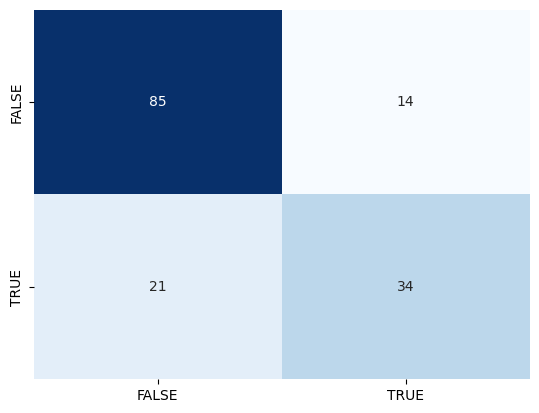

In [ ]:
# Оценка модели
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['FALSE', 'TRUE'],
            yticklabels=['FALSE', 'TRUE'])
plt.show()

Модель хорошо справляется с предсказанием здоровых людей. Также не плохо определяет наличие диабета у больных людей.

*Получение коэффициентов модели*

In [ ]:
# Вывод коэффициентов модели
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Pregnancies,0.946862
Glucose,5.043018
BloodPressure,0.000000
SkinThickness,0.000000
Insulin,0.000000
BMI,4.115022
DiabetesPedigreeFunction,0.887889
Age,1.665909


Анализ коэффицентов:

* Glucose - самый сильный предиктор при диагностике диабета, так как уровень глюкозы является ключевым фактором при диагностике диабета;
* BMI - индекс массы тела также является сильным предиктором при диагностике диабета, т.к. люди с ожирением часто болеют диабетом;
* Age, Pregnancies и DiabetesPedigreeFunction - имеют положительное влияние на предсказание диабета;
* Признаки BloodPressure, SkinThickness и Insulin не оказывают влияние на предсказание диабета.

*Вычисление F–статистики и p-значений*

In [ ]:
# Вычисление F-статистики и p-значений для признаков
f_statistic, p_values = f_classif(X_train, y_train)

# Вывод результатов
f_statistics_df = pd.DataFrame({'Feature': X.columns, 'F-statistic': f_statistic, 'p-value': p_values})
f_statistics_df

,Feature,F-statistic,p-value
0,Pregnancies,27.550001,2.113983e-07
1,Glucose,192.218488,3.299345e-38
2,BloodPressure,16.007404,7.082187e-05
3,SkinThickness,28.758616,1.163725e-07
4,Insulin,22.569200,2.528188e-06
5,BMI,69.389523,5.312943e-16
6,DiabetesPedigreeFunction,14.977704,1.204708e-04
7,Age,52.326951,1.410539e-12


Статистические данные показывают:
* Glucose - самый статестически важный предиктор при диагностике наличия диабета;
* BMI и Age - также имеют высокую статестическую важность;
* Остальные признаки оказались с p-значением меньше 0.05, что также свидетельствует о статистической значимости этих признаков при диагностике заболевания.